<h1 style="font-size:260%;"><center>Exploration of data DATASUS hospital expenses from 2008/Jan until 2020/Aug.</center></h1>

# Table of Contents:

- [Lesson 1 - Using alternative data sources](#Lesson-1---Using-alternative-data-sources)
    - [Part 01](#Lesson-1---Part-01)
        - [Challenge 1 - Read a table from Wikipedia](#Challenge-1:-Read-a-table-from-Wikipedia)
        - [Challenge 2 - Clean the dataframe](#Challenge-2:-Clean-the-dataframe)
    - [Part 02](#Lesson-1---Part-02)
        - [Challenge 3 - Study and Lean about strings and its methods](#Challenge-3:-Study-and-learn-about-strings-and-its-methods)
        - [Challenge 4 - Create a function to clean population_data_df dataframe and to merge population and recent_month](#Challenge-4:-Create-a-function-to-clean-population_data_df-dataframe-and-to-merge-population-and-recent_month)

# Lesson 1 - Using alternative data sources
Aula 01: Usando fontes alternativas de dados

---

# Lesson 1 - Part 01

## 01. Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

## 02. Getting the dataset

In [2]:
url='https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv'

hospital_expenses = pd.read_csv(url, encoding='ISO-8859-1',
                                skiprows=3, sep=';', skipfooter=12,
                                thousands='.', decimal=',',
                                engine='python')

hospital_expenses.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,...,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,4.206680e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,...,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


## 03. Recap module 1: Cleaning the data

In [3]:
columns_without_null_values = hospital_expenses \
                                    .mean() \
                                    .index \
                                    .tolist()

columns_without_null_values.insert(0, 'Unidade da Federação')

hospital_expenses_cleaned_null = \
    hospital_expenses[columns_without_null_values] \
        .set_index('Unidade da Federação')

hospital_expenses_cleaned = \
    hospital_expenses_cleaned_null.drop("Total", axis=1)

In [4]:
state_region = {'1': 'Norte',
                '2': 'Nordeste',
                '3': 'Sudeste',
                '4': 'Sul',
                '5': 'Centro-Oeste'}

hospital_expenses_region = hospital_expenses_cleaned.copy()

hospital_expenses_region['Região'] = \
        hospital_expenses_region \
            .index.str[0] \
            .map(state_region)

In [5]:
hospital_expenses_from_2008fev_region = \
    hospital_expenses_region.iloc[:,6:]

In [6]:
recent_month_2 = hospital_expenses_from_2008fev_region.columns[-2]

recent_month_hospital_expenses = hospital_expenses_cleaned[recent_month_2] \
                                            .sort_values(ascending=False)

## 04. Let's start!

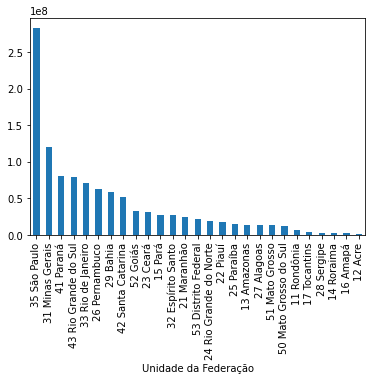

In [7]:
recent_month_hospital_expenses.plot(kind='bar')
plt.show()

In [8]:
recent_month_hospital_expenses.head()

Unidade da Federação
35 São Paulo            2.827096e+08
31 Minas Gerais         1.204672e+08
41 Paraná               8.032085e+07
43 Rio Grande do Sul    7.892970e+07
33 Rio de Janeiro       7.154023e+07
Name: 2020/Jul, dtype: float64

In [9]:
recent_month_hospital_expenses_by_state_prop = \
    (recent_month_hospital_expenses / 
     recent_month_hospital_expenses.sum())

recent_month_hospital_expenses_by_state_prop

Unidade da Federação
35 São Paulo              0.257158
31 Minas Gerais           0.109579
41 Paraná                 0.073061
43 Rio Grande do Sul      0.071796
33 Rio de Janeiro         0.065074
26 Pernambuco             0.056692
29 Bahia                  0.053575
42 Santa Catarina         0.047086
52 Goiás                  0.030472
23 Ceará                  0.028025
15 Pará                   0.025123
32 Espírito Santo         0.024979
21 Maranhão               0.022171
53 Distrito Federal       0.020224
24 Rio Grande do Norte    0.017822
22 Piauí                  0.016391
25 Paraíba                0.014091
13 Amazonas               0.012151
27 Alagoas                0.011905
51 Mato Grosso            0.011901
50 Mato Grosso do Sul     0.011378
11 Rondônia               0.006738
17 Tocantins              0.004084
28 Sergipe                0.003013
14 Roraima                0.002492
16 Amapá                  0.001960
12 Acre                   0.001059
Name: 2020/Jul, dtype: float64

- Observing the data proportionally.
- 25.7% of total hospital expenses ocurred in São Paulo.
- São Paulo has 26% of the population of Brazil?
- Also think about the age group, which one spends more in hospital? how is the age group distributed in the states?

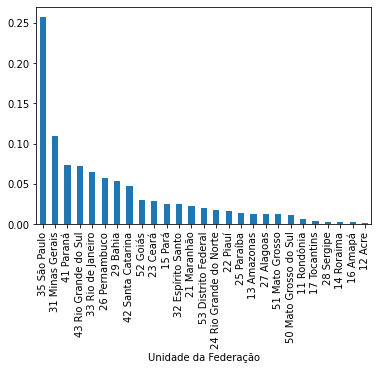

In [10]:
recent_month_hospital_expenses_by_state_prop \
    .plot(kind='bar')
plt.show()

- The proportion of the bars is the same as in the previous graph.

### Other ways to read data

- through excel file:

In [11]:
url_population = 'https://github.com/alura-cursos/agendamento-hospitalar/blob/main/dados/estimativa_dou_2020.xls?raw=true'

population_estimate_ibge = pd.read_excel(url_population, skiprows=2)
population_estimate_ibge.head()

,Brasil,Unnamed: 1,211755692
0,Região Norte,NaN,18672591
1,Rondônia,NaN,1796460
2,Acre,NaN,894470
3,Amazonas,NaN,4207714
4,Roraima,NaN,631181


- copy and paste:

In [12]:
population_data = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 331 292	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 279 638	3,4%	 Sérvia (7 114 393)
12	 Goiás	7 142 070	3,4%	 Paraguai (7 003 406)
11	 Maranhão	7 127 460	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 228 381	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)
"""

# fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [13]:
population_data_io = StringIO(population_data)

population_data_df = pd.read_csv(population_data_io, 
                                 sep='\t')

population_data_df.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 331 292,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)


## Challenge 1: Read a table from Wikipedia

- html:

In [14]:
url_population_wiki = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
population_estimate_wiki = pd.read_html(url_population_wiki, 
                                        thousands=' ', index_col=0)[0]

population_estimate_wiki.head()

,Unidade federativa,População,% da pop. total,País comparável (habitantes)
Posição,,,,
1,São Paulo,46289333,"21,9%",Espanha (46 439 864)
2,Minas Gerais,21331292,"10,1%",Sri Lanka (20 675 000)
3,Rio de Janeiro,17366189,"8,2%",Países Baixos (16 922 900)
4,Bahia,14930634,"7,1%",Chade (14 037 000)
5,Paraná,11516840,"5,4%",Bolívia (11 410 651)


## Challenge 2: Clean the dataframe 
For example: change column names and values for population column

In [15]:
population_estimate_wiki = \
    population_estimate_wiki \
        .rename(columns={'Unidade federativa': 'uf'})

population_estimate_wiki.columns = \
    population_estimate_wiki.columns.str.lower() \
                                    .str.replace(' ', '_') \
                                    .str.normalize('NFKD') \
                                    .str.encode('ascii', errors='ignore') \
                                    .str.decode('utf-8')

population_estimate_wiki = \
    population_estimate_wiki \
        .reset_index() \
        .set_index('uf')

population_estimate_wiki.head()

,Posição,populacao,%_da_pop._total,pais_comparavel_(habitantes)
uf,,,,
São Paulo,1,46289333,"21,9%",Espanha (46 439 864)
Minas Gerais,2,21331292,"10,1%",Sri Lanka (20 675 000)
Rio de Janeiro,3,17366189,"8,2%",Países Baixos (16 922 900)
Bahia,4,14930634,"7,1%",Chade (14 037 000)
Paraná,5,11516840,"5,4%",Bolívia (11 410 651)


# Lesson 1 - Part 02

In [16]:
population_estimate_2020 = \
    population_estimate_wiki[['populacao']]

population_estimate_2020.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21331292
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


In [17]:
population_estimate_2020.index.str[:3]

Index(['São', 'Min', 'Rio', 'Bah', 'Par', 'Rio', 'Per', 'Cea', 'Par', 'San',
       'Goi', 'Mar', 'Ama', 'Esp', 'Par', 'Rio', 'Mat', 'Ala', 'Pia', 'Dis',
       'Mat', 'Ser', 'Ron', 'Toc', 'Acr', 'Ama', 'Ror'],
      dtype='object', name='uf')

In [18]:
# pd.options.display.float_format = '{x:,.2f}'.format

recent_month_hospital_expenses.head()

Unidade da Federação
35 São Paulo            2.827096e+08
31 Minas Gerais         1.204672e+08
41 Paraná               8.032085e+07
43 Rio Grande do Sul    7.892970e+07
33 Rio de Janeiro       7.154023e+07
Name: 2020/Jul, dtype: float64

In [19]:
# removing the numbers at the beginning of each state
recent_month_hospital_expenses.index = \
    recent_month_hospital_expenses.index.str[3:]

recent_month_hospital_expenses.head()

Unidade da Federação
São Paulo            2.827096e+08
Minas Gerais         1.204672e+08
Paraná               8.032085e+07
Rio Grande do Sul    7.892970e+07
Rio de Janeiro       7.154023e+07
Name: 2020/Jul, dtype: float64

In [20]:
# how to remove spaces from the beginning and end of the string
# there is no space in my indexes, this code snippet is just to show how to do that
population_estimate_2020.index.str.strip()

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Goiás', 'Maranhão', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

**Challenge 3: Learn about strings and its methods.**

In [21]:
population_estimate_2020 \
    .join(recent_month_hospital_expenses)

,populacao,2020/Jul
uf,,
São Paulo,46289333,2.827096e+08
Minas Gerais,21331292,1.204672e+08
Rio de Janeiro,17366189,7.154023e+07
Bahia,14930634,5.889810e+07
Paraná,11516840,8.032085e+07
Rio Grande do Sul,11422973,7.892970e+07
Pernambuco,9616621,6.232544e+07
Ceará,9187103,3.080922e+07
Pará,8690745,2.761873e+07


In [22]:
# population_data_df has duplicate state indexes
# i'm not using this variable, but just to learn how to correct it

population_data_df = population_data_df \
                        .set_index('Unidade federativa')

for state in recent_month_hospital_expenses.index:
    #print(f'{state} {state} => {state}')
    population_data_df.index = \
        population_data_df.index.str.replace(f'{state} {state}', state)
    
population_data_df.index

Index([                   nan,           ' São Paulo',        ' Minas Gerais',
            ' Rio de Janeiro',                'Bahia',              ' Paraná',
         ' Rio Grande do Sul',          ' Pernambuco',               ' Ceará',
                       'Pará',      ' Santa Catarina',               ' Goiás',
                  ' Maranhão',            ' Amazonas',      ' Espírito Santo',
                   ' Paraíba', ' Rio Grande do Norte',         ' Mato Grosso',
                   ' Alagoas',               ' Piauí',    ' Distrito Federal',
        ' Mato Grosso do Sul',             ' Sergipe',            ' Rondônia',
                 ' Tocantins',                ' Acre',               ' Amapá',
                   ' Roraima'],
      dtype='object', name='Unidade federativa')

**Challenge 4: Create a function to clean population_data_df dataframe.**

## Challenge 3: Study and learn about strings and its methods

See: https://docs.python.org/3/library/string.html

## Challenge 4: Create a function to clean population_data_df dataframe and to merge population and recent_month

In [23]:
def clean_population_data_df(df2: pd.DataFrame, population=population_data_df) -> pd.DataFrame:
    '''
    Return population_data_df with population column and uf as its index.
    
    Clean dataframe columns: in lower case, with underscore instead of spaced, and normalized. 
    It also renames a unidade_federativa column to uf. 
    
    Setting uf as an index.
    
    Clean values: clean index values and population values. 
    (It uses another df (df2) to clean the uf values)
    '''
    
    # cleaning columns
    population.columns = population.columns.str.lower() \
                                   .str.replace(' ', '_') \
                                   .str.normalize('NFKD') \
                                   .str.encode('ascii', errors='ignore') \
                                   .str.decode('utf-8')
    
    population = population.rename(columns={'unidade_federativa': 'uf'})
    
    # setting uf index
    population = population.reset_index().set_index('uf')
    
    # cleaning values
    population['populacao'] = population['populacao'].str.replace(' ', '')
    
    population.index = population.index.str.strip()
    
    for state in df2.index:
        population.index = population.index.str.replace(f'{state} {state}', state)
    
    return population[['populacao']]



def join_population_hospital_expenses(population=population_data_df, he=population_data_df) -> pd.DataFrame:
    '''
    Return population_data_df joined with recent_month_hospital_expenses.
    population_data_df should have 'uf' as index.
    '''
    return population.join(he)

In [24]:
population_data_io = StringIO(population_data)

population_data_df = pd.read_csv(population_data_io, 
                                 sep='\t')[1:]

population_data_df.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 331 292,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


In [25]:
recent_month_hospital_expenses.head()

Unidade da Federação
São Paulo            2.827096e+08
Minas Gerais         1.204672e+08
Paraná               8.032085e+07
Rio Grande do Sul    7.892970e+07
Rio de Janeiro       7.154023e+07
Name: 2020/Jul, dtype: float64

In [27]:
population_data_df_cleaned = \
    clean_population_data_df(df2=recent_month_hospital_expenses,
                             population=population_data_df)

# setting parameters just to be clear
join_population_hospital_expenses(population=population_data_df_cleaned,
                                  he=recent_month_hospital_expenses) \
    .head()

,populacao,2020/Jul
uf,,
São Paulo,46289333,2.827096e+08
Minas Gerais,21331292,1.204672e+08
Rio de Janeiro,17366189,7.154023e+07
Bahia,14930634,5.889810e+07
Paraná,11516840,8.032085e+07
